In [51]:
import requests  
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from cycler import cycler

In [3]:
# data taken from: http://data2.unhcr.org/en/situations/mediterranean
url1 = "https://data2.unhcr.org/api/population/get/timeseries?widget_id=77882&sv_id=11&population_group=4797&frequency=month&fromDate=2014-01-01"
response1 = requests.get(url1)
migration_death = response1.json()

In [60]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,

    'figure.facecolor': '#FAFAFA',
    
### AXES
    'axes.facecolor': '#FAFAFA',
    'axes.edgecolor': 'black',
    'axes.linewidth': 0.8,
    'axes.grid': True,
    'axes.titlesize': 'medium',
    'axes.labelweight': 'normal',  # weight of the x and y labels
    'axes.labelcolor': 'black',
    'axes.axisbelow': 'line',
    "axes.spines.left" : False,
    "axes.spines.right" : False,
    "axes.spines.top" : False,
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#673AB7', '#80DEEA', '#FFD600', '#FF9E80', '#CCFF90', '#8c564b', 
                                        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
#axes.xmargin        : .05  # x margin.  See `axes.Axes.margins`
#axes.ymargin        : .05  # y margin See `axes.Axes.margins`

## LINES
    'lines.linewidth': 1.5,
    'lines.linestyle': '-',

## LEGEND
   'legend.frameon': True,     
    'legend.framealpha': 0.8,   
    'legend.facecolor': 'inherit',
    #'legend.edgecolor': 0.8,     
    'legend.fancybox': True,     

## FONT
    'font.family': 'sans-serif',
    'font.style': 'normal',
    'font.variant': 'normal',
    'font.weight': 'medium',
    'font.stretch': 'normal',
    'font.size': 19,
    
## GRID
    'grid.color': '#616161',
    "grid.linewidth": 0.3,
    'grid.linestyle': '-.',
    'grid.alpha': 1.0,
    
## TICKS
    'xtick.bottom': False,
    'xtick.color': '#616161',
    'xtick.direction': 'in',
    'xtick.labelbottom': True,
    'xtick.labelsize': 'medium',
#    'xtick.labeltop': False,
#    'xtick.major.bottom': True,
    'xtick.major.pad': 3.5,
#    'xtick.major.size': 3.0,
#    'xtick.major.top': True,
    'xtick.major.width': 1,
#    'xtick.minor.bottom': True,
#    'xtick.minor.pad': 3.4,
#    'xtick.minor.size': 2.0,
#    'xtick.minor.top': True,
#    'xtick.minor.visible': False,
#    'xtick.minor.width': 0.6,
#    'xtick.top': False,
#    'ytick.alignment': 'center_baseline',
    'ytick.color': '#616161',
    'ytick.direction': 'in',
#    'ytick.labelleft': True,
#    'ytick.labelright': False,
#    'ytick.labelsize': 'medium',
#    'ytick.left': True,
#    'ytick.major.left': True,
#    'ytick.major.pad': 3.5,
#    'ytick.major.right': True,
#    'ytick.major.size': 0.0,
#    'ytick.major.width': 0.8,
#    'ytick.minor.left': True,
#    'ytick.minor.pad': 3.4,
#    'ytick.minor.right': True,
#    'ytick.minor.size': 0.0,
#    'ytick.minor.visible': False,
#    'ytick.minor.width': 0.6,
#    'ytick.right': False
})

In [5]:
death_by_month = migration_death['data']['timeseries']

In [6]:
df = pd.DataFrame(death_by_month[:48])

In [7]:
df['years'] = pd.to_datetime(df['year'], format='%Y')

In [8]:
#df['months'] = pd.to_datetime(df['month'], format='%M', origin=pd.Timestamp('2014-01-01'))
#df['months'] = pd.to_datetime(df['month'], format='%M')
df['months'] = pd.to_datetime(df['unix_timestamp'], unit='s')
df.head()

,individuals,month,unix_timestamp,year,years,months
0,3223,1,1390867200,2014,2014-01-01,2014-01-28
1,4344,2,1393545600,2014,2014-01-01,2014-02-28
2,7231,3,1395964800,2014,2014-01-01,2014-03-28
3,17069,4,1398643200,2014,2014-01-01,2014-04-28
4,16594,5,1401235200,2014,2014-01-01,2014-05-28


In [9]:
df.rename(columns={'individuals': 'total'}, inplace=True)
df.head(2)

,total,month,unix_timestamp,year,years,months
0,3223,1,1390867200,2014,2014-01-01,2014-01-28
1,4344,2,1393545600,2014,2014-01-01,2014-02-28


In [10]:
df.head(2)

,total,month,unix_timestamp,year,years,months
0,3223,1,1390867200,2014,2014-01-01,2014-01-28
1,4344,2,1393545600,2014,2014-01-01,2014-02-28


In [11]:
per_year = df.resample('A', on='years').sum().head()
per_year

,total,month,unix_timestamp,year
years,,,,
2014-12-31,215934,78,16863033600,24168
2015-12-31,1015309,78,17241465600,24180
2016-12-31,362914,78,17620761600,24192
2017-12-31,178043,78,17999366400,24204


In [76]:
def get_color(total):
    if total > 100000:
        return '#673AB7'
    else:
        return '#7f7f7f'
bar_colors = [get_color(total) for total in per_month.total]

In [ ]:
def get_labels

[Text(0,0,'January 2014 '),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'2015'),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'October'),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'2016 '),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'2017'),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

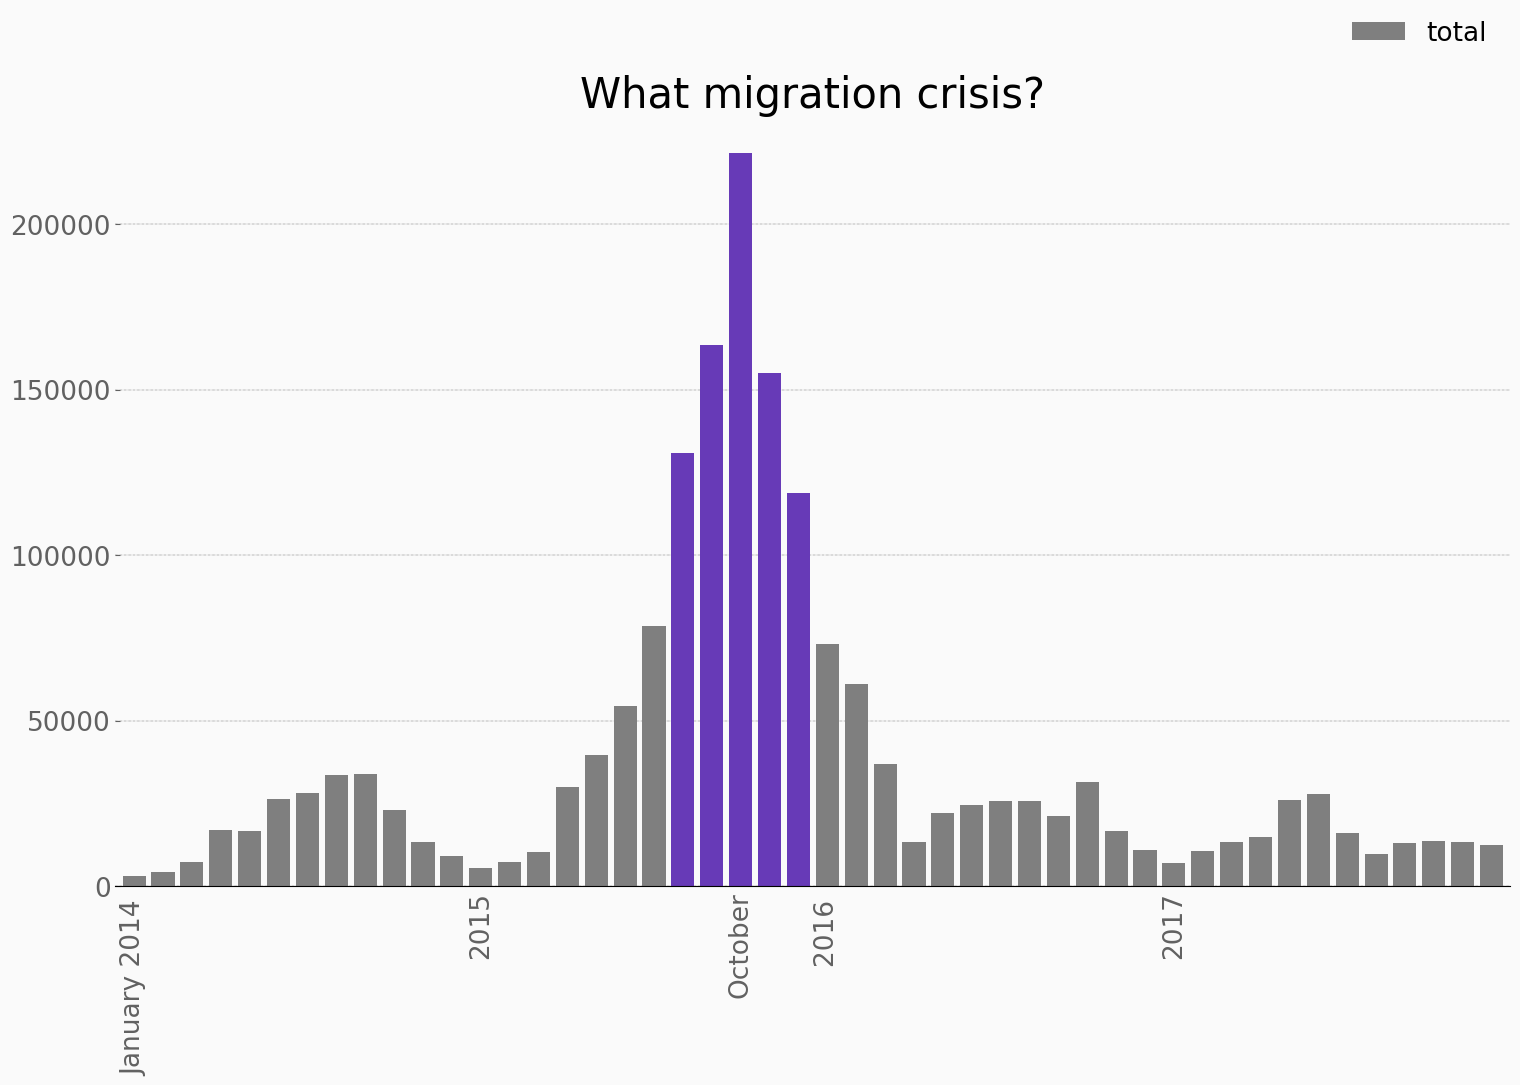

In [77]:
per_month = df.resample('M', on='months').sum()
ax = per_month.plot(kind='bar', y='total', color=bar_colors, figsize=(18,10), width=0.8)
ax.legend(frameon=False,
          bbox_to_anchor=(0.9, 1.0),
          bbox_transform=plt.gcf().transFigure)
ax.set_title('What migration crisis?', fontsize=30)
ax.xaxis.grid(False)
ax.xaxis.label.set_visible(False)
ax.xaxis.grid(False)
ax.set_xticklabels(['January 2014 ', '', '', '','', '', '', '','', '', '', '','2015', '', '', '','', '', '', '','', 'October', '', '',
                    '2016 ', '', '', '','', '', '', '','', '', '', '','2017', '', '', '','', '', '', '',
                   '', '', '', ''])

In [56]:
#url2 = "https://data2.unhcr.org/api/population/get/origin?widget_id=77881&sv_id=11&population_collection=28&fromDate=2014-01-01"
url2 = 'https://data2.unhcr.org/api/population/get/timeseries?widget_id=77882&sv_id=11&population_group=4797&frequency=month&fromDate=2014-01-01'
response2 = requests.get(url2)
migration_death_nationality = response2.json()

In [57]:
migration_death_nationality

{'situation_view_id': '11',
 'situation_view_name': 'Mediterranean Situation',
 'situation_view_description': 'Persecution, conflict and poverty forced over 1 million people to flee to Europe in 2015. Many came seeking safety for themselves and their families, risking their lives and facing a treacherous journey',
 'data': {'timeseries': [{'month': 1,
    'year': 2014,
    'unix_timestamp': 1390867200,
    'individuals': 3223},
   {'month': 2,
    'year': 2014,
    'unix_timestamp': 1393545600,
    'individuals': 4344},
   {'month': 3,
    'year': 2014,
    'unix_timestamp': 1395964800,
    'individuals': 7231},
   {'month': 4,
    'year': 2014,
    'unix_timestamp': 1398643200,
    'individuals': 17069},
   {'month': 5,
    'year': 2014,
    'unix_timestamp': 1401235200,
    'individuals': 16594},
   {'month': 6,
    'year': 2014,
    'unix_timestamp': 1403913600,
    'individuals': 26211},
   {'month': 7,
    'year': 2014,
    'unix_timestamp': 1406505600,
    'individuals': 28283},


In [59]:
migration_death_nationality['data']['timeseries'][0]

{'month': 1, 'year': 2014, 'unix_timestamp': 1390867200, 'individuals': 3223}

In [52]:
testing_list=[]
for data in migration_death_nationality['data']:
    test_dict = {}
    test_dict['country']      = data['pop_origin_name']
    test_dict['country_code'] = data['pop_origin_code']
    test_dict['datetime'] = data['date']
    test_dict['year'] = data['year']
    test_dict['month'] = data['month']
    test_dict['people_came'] = data['individuals']
    testing_list.append(test_dict)

In [53]:
testing_list

[{'country': 'Syrian Arab Rep.',
  'country_code': 'SYR',
  'datetime': '2018-06-30',
  'year': '2018',
  'month': '12',
  'people_came': '582827'},
 {'country': 'Afghanistan',
  'country_code': 'AFG',
  'datetime': '2018-06-30',
  'year': '2018',
  'month': '12',
  'people_came': '254809'},
 {'country': 'Iraq',
  'country_code': 'IRQ',
  'datetime': '2018-06-30',
  'year': '2018',
  'month': '12',
  'people_came': '124230'},
 {'country': 'Nigeria',
  'country_code': 'NIG',
  'datetime': '2018-05-31',
  'year': '2018',
  'month': '12',
  'people_came': '79183'},
 {'country': 'Eritrea',
  'country_code': 'ERT',
  'datetime': '2018-05-31',
  'year': '2018',
  'month': '12',
  'people_came': '69515'},
 {'country': 'Others',
  'country_code': 'OTH',
  'datetime': '2018-06-30',
  'year': '2018',
  'month': '12',
  'people_came': '41719'},
 {'country': 'Pakistan',
  'country_code': 'PAK',
  'datetime': '2018-06-30',
  'year': '2018',
  'month': '12',
  'people_came': '40903'},
 {'country': "

In [54]:
test_df = pd.DataFrame(testing_list)
test_df

,country,country_code,datetime,month,people_came,year
0,Syrian Arab Rep.,SYR,2018-06-30,12,582827,2018
1,Afghanistan,AFG,2018-06-30,12,254809,2018
2,Iraq,IRQ,2018-06-30,12,124230,2018
3,Nigeria,NIG,2018-05-31,12,79183,2018
4,Eritrea,ERT,2018-05-31,12,69515,2018
5,Others,OTH,2018-06-30,12,41719,2018
6,Pakistan,PAK,2018-06-30,12,40903,2018
7,Côte d'Ivoire,ICO,2018-05-31,12,37823,2018
8,Mali,MLI,2018-05-31,12,31512,2018
9,Guinea,GUI,2018-05-31,12,29158,2018
